In [5]:
# The one-dimensional Diffusion-Advection equation is
# D (d^2f(x))/(dx^2) - d/dx (v(x)f(x)) = 0
# where v(x) is some velocity field that advects particles around. The first
# term is the diffusion term that tends to spread particles.

#Use a second order finite difference scheme to solve the diffusion-
#advection with D = 2 and v(x) = − sin x on [0, 25] with boundary
#conditions f(0) = 1 and f(25) = 0. Use N = 1000 grid points.

#a

import numpy as np
import matplotlib.pyplot as plt

# parameters
D = 15
N = 1000
L = 25.0
dx = L / N 


def velocity(x):
    return -np.sin(x)

x = np.linspace(0, L, N)
f = np.zeros(N)

f[0] = 1.0
f[-1] = 0.0

A1 = np.zeros((N, N))
A2 = np.zeros((N, N))
H = np.zeros((N, N))

for i in range(1, N - 1):
    A1[i, i - 1] = -1/(2*dx)
    A1[i, i + 1] = 1/(2*dx)


for i in range(1, N - 1):
    A2[i, i] = -2 / dx**2
    A2[i, i - 1] = 1/ dx**2
    A2[i, i + 1] = 1/ dx**2


v = velocity(x)
H = np.diag(v)


A_temp = A1 @ H


A = D*A2 - A_temp 

A[0,0] = 1
A[-1,-1] = 1

    
f = np.linalg.solve(A, f)


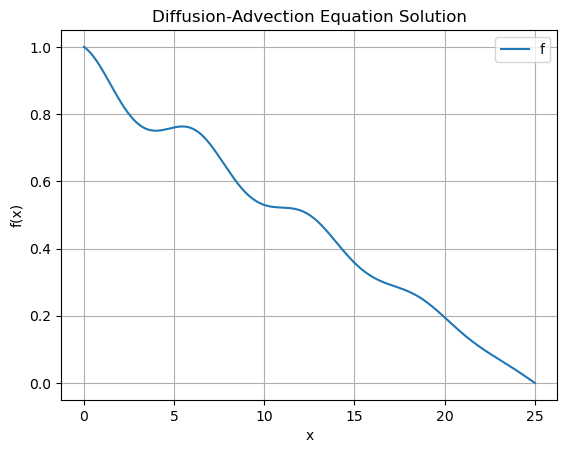

In [6]:
plt.plot(x, f, label='f')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Diffusion-Advection Equation Solution')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
# b
# It is always a good idea to ‘sanity check’ the result of a numerical solution.
# Explain the shape of f(x). Does it make sense compared to the
# physical interpretation of the diffusion-advection equation?

# We start with a high concentration of particles, at x = 0 (1). 
# Over time, due to diffusion and advection, the particles spread out and the concentration becomes smaller. 

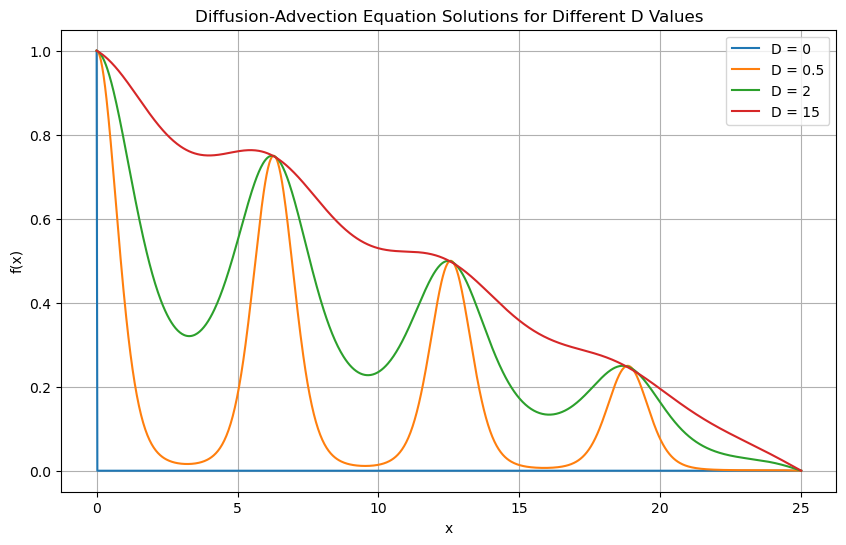

In [9]:
# c
# Explain what happens for D → 0 and D → ∞. Plot for instance
# D = 0.5 and D = 15 and compare to D = 2. Would your code work for
# D = 0?

import numpy as np
import matplotlib.pyplot as plt

D_values = [0.5, 2, 15]
N = 1000
L = 25.0
dx = L / N 

def velocity(x):
    return -np.sin(x)

x = np.linspace(0, L, N)
f_initial = np.zeros(N)
f_initial[0] = 1.0
f_initial[-1] = 0.0

plt.figure(figsize=(10, 6))

for D in D_values:
    f = np.copy(f_initial)

    A1 = np.zeros((N, N))
    A2 = np.zeros((N, N))
    H = np.zeros((N, N))

    for i in range(1, N - 1):
        A1[i, i - 1] = -1 / (2 * dx)
        A1[i, i + 1] = 1 / (2 * dx)

    for i in range(1, N - 1):
        A2[i, i] = -2 / dx**2
        A2[i, i - 1] = 1 / dx**2
        A2[i, i + 1] = 1 / dx**2

    v = velocity(x)
    H = np.diag(v)

    A_temp = A1 @ H
    A = D * A2 - A_temp 
    A[0, 0] = 1
    A[-1, -1] = 1

    f = np.linalg.solve(A, f)

    plt.plot(x, f, label=f'D = {D}')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Diffusion-Advection Equation Solutions for Different D Values')
plt.legend()
plt.grid(True)
plt.show()

# When D approaches 0, the diffusion becomes negligible, and you therefore have a scenario where advection dominates.
# When D approaches ∞, the diffusion becomes more dominant.